# Machine Learning

## Lab 3 - Logistic Regression

### Prof. Neylson Crepalde

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Módulo da regressão Logística de StatsModels
from statsmodels.discrete.discrete_model import Logit

# Módulos da regressão logística do sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [106]:
# Importando os dados do banco Default
bd = pd.read_csv("https://raw.githubusercontent.com/neylsoncrepalde/ML_classes/master/Default.csv")
bd.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [107]:
# Verificando o tamanho do banco
bd.shape

(10000, 4)

In [108]:
# Verificando as variáveis
# Primeiro a variável resposta
print(bd["default"].value_counts())

No     9667
Yes     333
Name: default, dtype: int64


In [109]:
# Verificando Student
bd.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [110]:
# Verificando as variáveis numéricas
bd.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


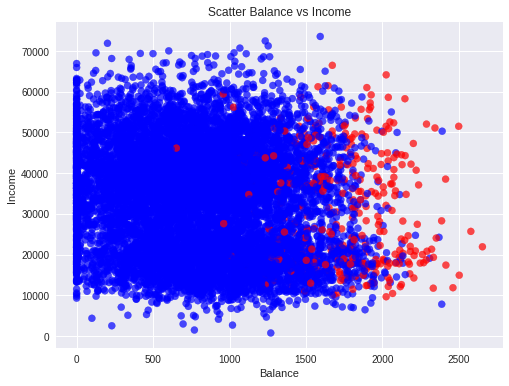

In [111]:
# Verificando a interação entre as variáveis com gráfico
# Plotando income X balance

# Prepara a cor
bd["color"] = 'blue'
bd.loc[bd.default == "Yes", "color"] = 'red'

# Gráfico
plt.figure(figsize=(8,6))
plt.scatter(x=bd.balance, y=bd.income, color=bd.color, s=50, alpha=.7)
plt.title("Scatter Balance vs Income")
plt.xlabel("Balance")
plt.ylabel("Income")
plt.show()

In [112]:
# Preprocessing
# Preparando os dados para estimação
## Transformando as categóricas em dummies
bd = bd.drop(columns=["color"]) # Tira a cor
bd1 = pd.get_dummies(bd, drop_first=True)
bd1.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


## Com StatsModels

In [113]:
# Estimando a regressão Logística com StatsModels
y = bd1.default_Yes
X = bd1[["balance", "income", "student_Yes"]]
smodel = Logit(y, X).fit()
print(smodel.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                       Results: Logit
Model:              Logit            No. Iterations:   9.0000
Dependent Variable: default_Yes      Pseudo R-squared: nan   
Date:               2019-03-18 02:07 AIC:              inf   
No. Observations:   10000            BIC:              inf   
Df Model:           2                Log-Likelihood:   -inf  
Df Residuals:       9997             LL-Null:          -inf  
Converged:          1.0000           Scale:            1.0000
-------------------------------------------------------------
              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------
balance       0.0028   0.0001  22.2911 0.0000  0.0025  0.0030
income       -0.0002   0.0000 -33.6716 0.0000 -0.0002 -0.0002
student_Yes  -3.7531   0.1527 -24.5803 0.0000 -4.0524 -3.4539



/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2397: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.llf/self.llnull


## Com sklearn

In [0]:
# Dividindo os dados em dados de treino e teste
y = bd1.default_Yes
X = bd1.drop(columns=["default_Yes"])
colunas = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=1)

In [115]:
model = LogisticRegression(solver="liblinear") # no parameter tunning for now.
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [116]:
# Checa os coeficientes
set(zip(colunas, model.coef_[0]))

{('balance', 0.00039286432498206083),
 ('income', -0.0001215918467297866),
 ('student_Yes', -2.6249170433995706e-06)}

In [117]:
# Verificando o ajuste do modelo pelo AUC
yhat = model.predict(X_test)
auc = roc_auc_score(y_test, yhat)
print("AUC: ", auc)

AUC:  0.5


Agora, vamos montar um modelo com os dados do banco **Titanic**.

# Titanic

In [0]:
titanic_train = pd.read_csv("https://raw.githubusercontent.com/rebeccabilbro/titanic/master/data/train.csv")
titanic_test = pd.read_csv("https://raw.githubusercontent.com/rebeccabilbro/titanic/master/data/test.csv")

In [132]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [133]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# Transforma Pclass em categórica
titanic_train['Pclass'] = titanic_train['Pclass'].astype('category')

In [136]:
# Vamos montar um modelo que explique a sobrevivência a partir da idade, da classe social e do Sexo
# Preprocessing
# Tira os nas
trainset = titanic_train[["Survived", "Pclass", "Sex", "Age"]].dropna()
trainset = pd.get_dummies(trainset, drop_first=True)
trainset.columns

Index(['Survived', 'Age', 'Pclass_2', 'Pclass_3', 'Sex_male'], dtype='object')

In [0]:
y = trainset.Survived
X = trainset[["Pclass_2", "Pclass_3", "Sex_male", "Age"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
colunas = X.columns

In [138]:
logmodel = LogisticRegression(solver="lbfgs", fit_intercept=True)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [139]:
print(set(zip(colunas, logmodel.coef_[0])))
print("Intercept:", logmodel.intercept_)

{('Sex_male', -2.2173561135761637), ('Age', -0.035078192806069476), ('Pclass_2', -1.1420945054861036), ('Pclass_3', -2.353872102098659)}
Intercept: [3.41922367]


In [140]:
# Testando o ajuste
yhat = logmodel.predict(X_test)
auc = roc_auc_score(y_test, yhat)
print("AUC for Titanic ML model: ", auc)

AUC for Titanic ML model:  0.7949934123847168
